In [39]:
import pandas as pd
import numpy as np

from train_val import search_space_dict, sigmoid, performing_tv 

from train_val import train_test

#perform one-hot-encoding tranformation

monks_3_train = pd.read_csv('monks-3.train', header=None, sep = '\s+', index_col=None,
                            names = ['class','a1','a2','a3','a4','a5','a6','Id'])

monks_3_test = pd.read_csv('monks-3.test', header=None, sep = '\s+', index_col=None,
                            names = ['class','a1','a2','a3','a4','a5','a6','Id'])


monks_3_train[['a1','a2','a3','a4','a5','a6']] = monks_3_train[['a1','a2','a3','a4','a5','a6']].astype(str)
monks_3_test[['a1','a2','a3','a4','a5','a6']] = monks_3_test[['a1','a2','a3','a4','a5','a6']].astype(str)
  
one_hot_monks_3_train = pd.get_dummies(monks_3_train, columns = ['a1','a2','a3','a4','a5','a6'])
one_hot_monks_3_test = pd.get_dummies(monks_3_test, columns = ['a1','a2','a3','a4','a5','a6'])

train_columns = [x for x in one_hot_monks_3_train.columns[2:]] + [x for x in one_hot_monks_3_train.columns[:2]]
test_columns = [x for x in one_hot_monks_3_test.columns[2:]] + [x for x in one_hot_monks_3_test.columns[:2]]

one_hot_monks_3_train = one_hot_monks_3_train.reindex(columns = train_columns)
one_hot_monks_3_test = one_hot_monks_3_test.reindex(columns = test_columns)

one_hot_monks_3_train = one_hot_monks_3_train.drop(['Id'], axis = 1)
one_hot_monks_3_test = one_hot_monks_3_test.drop(['Id'], axis = 1)

X_train = np.array(one_hot_monks_3_train)
X_test = np.array(one_hot_monks_3_test)

In [40]:
len(X_train)

122

Testing with no lambda value (slight overfitting noticeable looking at accuracy decrease in the test set.

In [41]:
search_space_def = search_space_dict(layers_range=[1], units_range=[4], eta_0_range=[0.6],
                        alpha_range=[0.4], lamb_range=[0.0], lamb0_range = [0.0], minibatch_size_range = [40], num_targets=1, configurations = 0)    

search_space_def[0][0]

{'units': array([4, 1]),
 'layers': 2,
 'eta_0': 0.6,
 'alpha': 0.4,
 'lamb': 0.0,
 'lamb0': 0.0,
 'minibatch_size': 40}

training error 0.12505322185931383, test error 0.24997605484727914
training error 0.12500647441850912, test error 0.25003754993240124
training error 0.12503814431134083, test error 0.2500643162270855
training error 0.12502297427454043, test error 0.2501170761707759
training error 0.1249987675209605, test error 0.2501711552970117
training error 0.1250190693107748, test error 0.25020029303200975
training error 0.12508462493308722, test error 0.25031728762662475
training error 0.1251106528464938, test error 0.25026250257323845
training error 0.12513395715201533, test error 0.2503654567150016
training error 0.1250469679868615, test error 0.250379830697555
training error 0.1250648426890075, test error 0.2504545477447767
training error 0.12498192932107192, test error 0.2504077306341252
training error 0.12499080157156231, test error 0.25042768890815587
training error 0.1250204396964851, test error 0.2504541031399556
training error 0.12522190897033103, test error 0.2503203501610822
training er

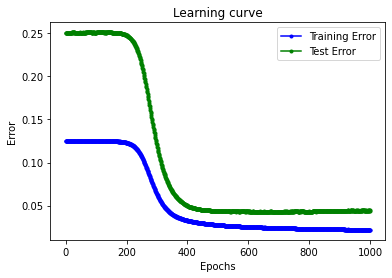

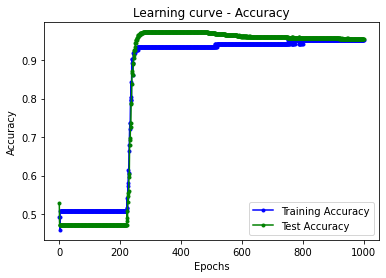

0.9537037037037036 0.04410764848015304


([<topologyNN.HiddenLayer at 0x7f9b7d58a520>,
 0.9537037037037036,
 0.04410764848015304,
 0.02192996392131699,
 0.9508196721311475)

In [42]:
train_test(hyperparams = search_space_def[0][0],
           num_inputs = 17, seed = 0, activation_output = sigmoid, activation_hidden = sigmoid,
           task = 'binary_classification', thr = 0.5, stop_class = 'GL', stop_param = 9, data_train = X_train, data_val = X_test)


Testing with lambda values seemingly tackles the overfitting problem after after about 300 epochs 

In [43]:
search_space_def = search_space_dict(layers_range=[1], units_range=[4], eta_0_range=[0.6],
                        alpha_range=[0.4], lamb_range=[0.001], lamb0_range = [0.0], minibatch_size_range = [40], num_targets=1, configurations = 0)    

search_space_def[0][0]

{'units': array([4, 1]),
 'layers': 2,
 'eta_0': 0.6,
 'alpha': 0.4,
 'lamb': 0.001,
 'lamb0': 0.0,
 'minibatch_size': 40}

training error 0.1250104793423171, test error 0.24997005005498446
training error 0.12502432306325656, test error 0.25005583052253794
training error 0.1250308213290121, test error 0.250066129306235
training error 0.12499501087166902, test error 0.25006607006360104
training error 0.12504080138193663, test error 0.2502035047196502
training error 0.12502329555558014, test error 0.2502490760237485
training error 0.1250535394612472, test error 0.2501775615194901
training error 0.12500664539923736, test error 0.2502826821760011
training error 0.12520010782604893, test error 0.2502733523940853
training error 0.12498160023992583, test error 0.2504057214319338
training error 0.1250455690091534, test error 0.2504606404612979
training error 0.12514867934042706, test error 0.2506699788073581
training error 0.12498684733689831, test error 0.2506068434170616
training error 0.12505741091217049, test error 0.2506307114956747
training error 0.12496820703241676, test error 0.2504649118577696
training err

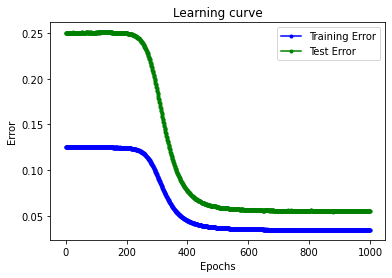

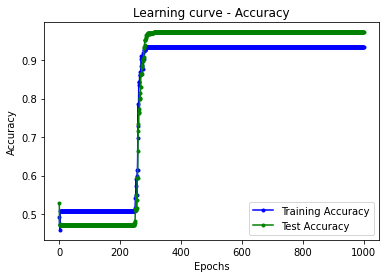

0.9722222222222222 0.05527534588923148


([<topologyNN.HiddenLayer at 0x7f9b7d7d3400>,
 0.9722222222222222,
 0.05527534588923148,
 0.03460435677125245,
 0.9344262295081968)

In [44]:
train_test(hyperparams = search_space_def[0][0],
           num_inputs = 17, seed = 0, activation_output = sigmoid, activation_hidden = sigmoid,
           task = 'binary_classification', thr = 0.5, stop_class = 'GL', stop_param = 3, data_train = X_train, data_val = X_test)


Multiple training trials with no lambda

In [45]:
search_space_def = search_space_dict(layers_range=[1], units_range=[4], eta_0_range=[0.6],
                        alpha_range=[0.4], lamb_range=[0.0], lamb0_range = [0.0], minibatch_size_range = [40], num_targets=1, configurations = 0)    

search_space_def[0][0]

{'units': array([4, 1]),
 'layers': 2,
 'eta_0': 0.6,
 'alpha': 0.4,
 'lamb': 0.0,
 'lamb0': 0.0,
 'minibatch_size': 40}

training error 0.12507337778440739, test error 0.2500475257473136
training error 0.12500840940681623, test error 0.2500989273097838
training error 0.12508773259888215, test error 0.25021244022177846
training error 0.12499000278952807, test error 0.25015325078366984
training error 0.12500161967797813, test error 0.250271541416718
training error 0.1251157116445189, test error 0.25042595878472906
training error 0.12515185921499167, test error 0.2504229510988416
training error 0.12510046288684717, test error 0.25023720304338765
training error 0.1250237716157477, test error 0.25035706618413917
training error 0.12513628079504593, test error 0.2505481746443148
training error 0.12499630025682516, test error 0.2504316272910247
training error 0.12497167880930386, test error 0.2503190639652848
training error 0.12497596759070778, test error 0.25029773532908567
training error 0.12503725294933066, test error 0.25019424013704794
training error 0.12500928808304185, test error 0.2503194885741708
traini

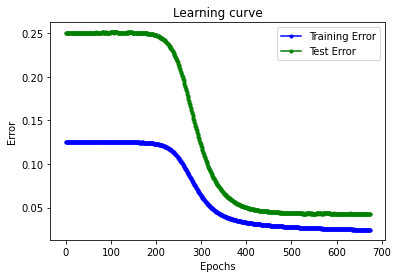

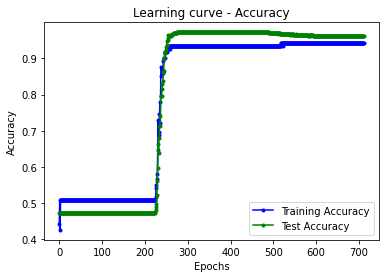

0.9606481481481481 0.042117109128568114
training error 0.12510962893558936, test error 0.24998356774969135
training error 0.1250625059089822, test error 0.250159119335797
training error 0.12524336215094434, test error 0.2502731545496675
training error 0.12497786085680497, test error 0.250167018426951
training error 0.12505164425103213, test error 0.2502338474383879
training error 0.12508167666466638, test error 0.25017134119401985
training error 0.12499677937371458, test error 0.25023568874991026
training error 0.12511365904188, test error 0.2501135972636859
training error 0.12503169933037586, test error 0.25012469514109753
training error 0.1250587339300916, test error 0.2502237837294142
training error 0.12499380967810912, test error 0.25040170477307205
training error 0.12501877064697572, test error 0.2504477019963638
training error 0.12499218901630912, test error 0.25045180915674464
training error 0.12500993311238454, test error 0.2504057094745052
training error 0.12500874923287705, t

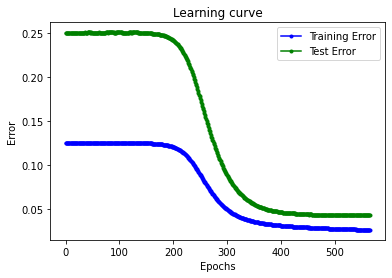

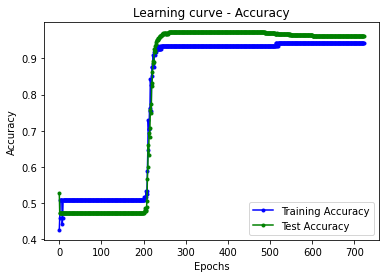

0.9606481481481481 0.04238018294264801
training error 0.12504230176505654, test error 0.2501096696400113
training error 0.1250189741400773, test error 0.250125717938614
training error 0.12535028866757034, test error 0.250108528362774
training error 0.12498933611297723, test error 0.2501372543575436
training error 0.12506406874734416, test error 0.25012097917691495
training error 0.1249781872778183, test error 0.2502361966707112
training error 0.12512090856547103, test error 0.2502335590053515
training error 0.12502765213789763, test error 0.2503883579500522
training error 0.1250859349120094, test error 0.25032973416722865
training error 0.12503243895528085, test error 0.2504213035178257
training error 0.12500218416281442, test error 0.25040654251021954
training error 0.1249873208598767, test error 0.25044644321135107
training error 0.12496652598495692, test error 0.25045576956110527
training error 0.12500247992492367, test error 0.2504723658494694
training error 0.12503767822445952, te

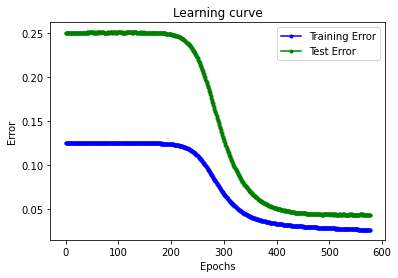

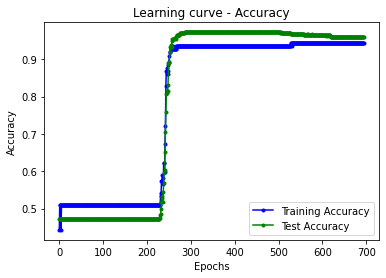

0.9606481481481481 0.042593143497150814
training error 0.12514096964174928, test error 0.25002808558635703
training error 0.12500632795960998, test error 0.2500659681012442
training error 0.12498763257965274, test error 0.2501499479911209
training error 0.1250004456648163, test error 0.2501617833351307
training error 0.12499752530094829, test error 0.25022596459337804
training error 0.1249855033135872, test error 0.2502012485578077
training error 0.1250761183859055, test error 0.250328915017666
training error 0.12499143775337997, test error 0.25032118791327457
training error 0.12503314624608614, test error 0.2503351514464269
training error 0.12498909847839919, test error 0.25034697415594553
training error 0.1251063935749746, test error 0.2504014893385028
training error 0.1252018040896415, test error 0.25042852406253796
training error 0.12498641294835845, test error 0.25044972919672154
training error 0.1251810064897117, test error 0.2505066548099154
training error 0.12507996149262574, t

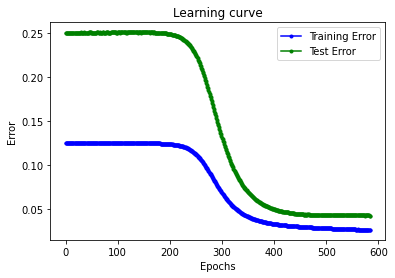

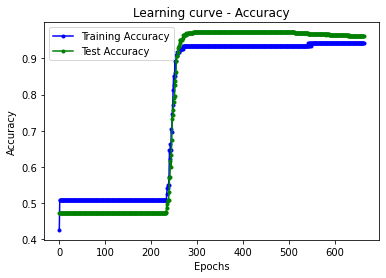

0.9606481481481481 0.042064713083538784
training error 0.12508784860829747, test error 0.2500330741885373
training error 0.12503652959696374, test error 0.2500086137462041
training error 0.1250681727900866, test error 0.2500799516443416
training error 0.12509215022633607, test error 0.25019666666734564
training error 0.12503364581344595, test error 0.2502070493018522
training error 0.12512781529662964, test error 0.2502904306255652
training error 0.1250490164338748, test error 0.2502668759109859
training error 0.12503293045046707, test error 0.25031312797233746
training error 0.12498900346188171, test error 0.250250824398161
training error 0.12497663643021936, test error 0.2502731492445097
training error 0.12506977673516395, test error 0.2503416902730832
training error 0.1251803412605109, test error 0.2503394119675832
training error 0.12498662535701456, test error 0.2502934716289592
training error 0.12501418688443947, test error 0.25018784549058487
training error 0.12516985756417556, t

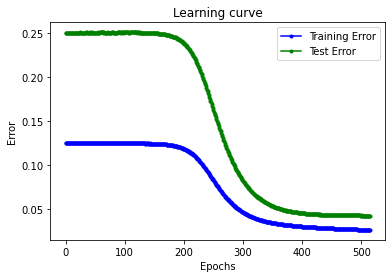

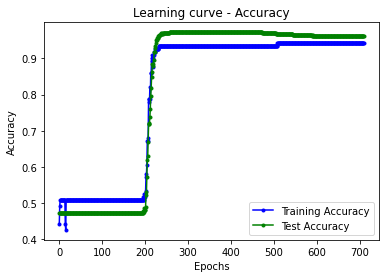

0.9606481481481481 0.04256066140775207
training error 0.12500928193055644, test error 0.24997731149512162
training error 0.1250743507194259, test error 0.24995756893063487
training error 0.12501778129615562, test error 0.24998114561878992
training error 0.1250715606986857, test error 0.2501145536273122
training error 0.12504154083597682, test error 0.2500834030221186
training error 0.12501160290466146, test error 0.25022389251039473
training error 0.12500655757849646, test error 0.25024668363022007
training error 0.12497407115753353, test error 0.25029825856817434
training error 0.1251266896247145, test error 0.2501810983940044
training error 0.12512153935388526, test error 0.2502111994326977
training error 0.12511070939491364, test error 0.2504732125664249
training error 0.12512961093483368, test error 0.25052037959307144
training error 0.12501316394507914, test error 0.2504858712942631
training error 0.1250210907538457, test error 0.2504399607249071
training error 0.12497419343133577

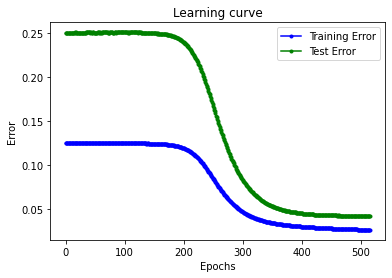

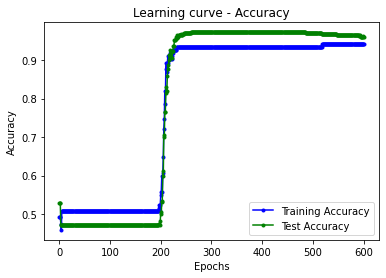

0.9606481481481481 0.04226421291424575
training error 0.12501383352764542, test error 0.25001460086332317
training error 0.12515798777427142, test error 0.25002361293112246
training error 0.12506932510220842, test error 0.2502708691126986
training error 0.1250551476936374, test error 0.25025563751038665
training error 0.12506207038983436, test error 0.25031209721935027
training error 0.12498515962924352, test error 0.250276309456083
training error 0.12499037707322684, test error 0.25035402976456145
training error 0.12497883996819248, test error 0.25036091258796134
training error 0.12506435265037696, test error 0.25052536816884513
training error 0.1251156383468343, test error 0.25042375106435244
training error 0.12500565937119862, test error 0.2503988040595272
training error 0.12513543444045094, test error 0.25034785984271124
training error 0.12496779906121987, test error 0.2504912166010315
training error 0.12498065628039211, test error 0.2504509840228963
training error 0.12506918905812

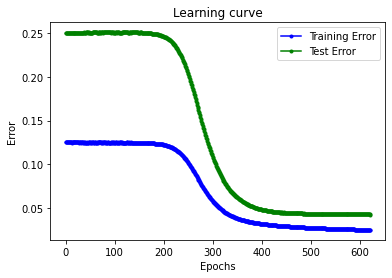

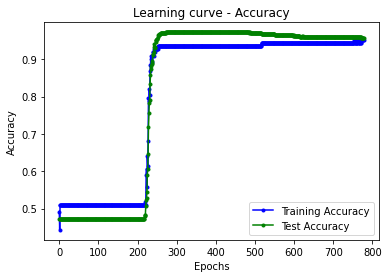

0.9560185185185185 0.04244510415612425
training error 0.1250216070346282, test error 0.250009364866003
training error 0.12504596295723666, test error 0.2500681663583951
training error 0.12500263800931047, test error 0.25021095840832475
training error 0.1250127029199794, test error 0.2503144131033662
training error 0.12499887347530493, test error 0.25036562413023866
training error 0.12510858639521938, test error 0.25038018088785297
training error 0.1250871853889031, test error 0.25039564999021857
training error 0.12510019260244754, test error 0.25026149424096
training error 0.12502982455563097, test error 0.2503254470556655
training error 0.12497650588545582, test error 0.25038950404762517
training error 0.12517285928149166, test error 0.2503426997624394
training error 0.12500694743799315, test error 0.2503050125205502
training error 0.12505691600115315, test error 0.250371141322745
training error 0.12506458730181103, test error 0.25039144577259065
training error 0.12525497551909232, te

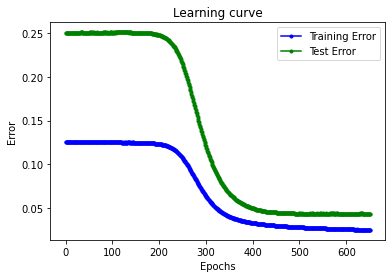

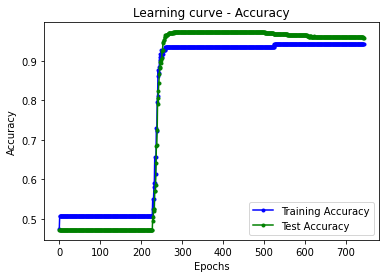

0.9583333333333333 0.0427091128981698
training error 0.12518026245133249, test error 0.24997815351255787
training error 0.12515857963980676, test error 0.25009455526198066
training error 0.12510679975802538, test error 0.24994307933701843
training error 0.1251161138805924, test error 0.2501280692831848
training error 0.12500374225567615, test error 0.2500707026333541
training error 0.1251969872451516, test error 0.25005458734581343
training error 0.12500503944659816, test error 0.2502209902401037
training error 0.12501094534854407, test error 0.2501420119491789
training error 0.12499068481410203, test error 0.2502628524485217
training error 0.1249811833686222, test error 0.2503569675903951
training error 0.12500993126447132, test error 0.25045684092407255
training error 0.1249697094821362, test error 0.250446067648558
training error 0.12504481941887458, test error 0.25040587876763437
training error 0.12506751967491092, test error 0.2505593337314507
training error 0.12497513542237237, t

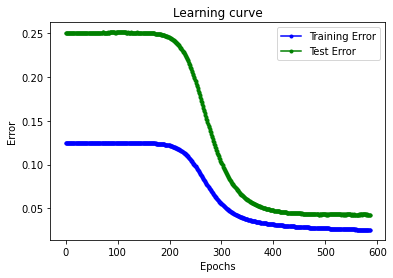

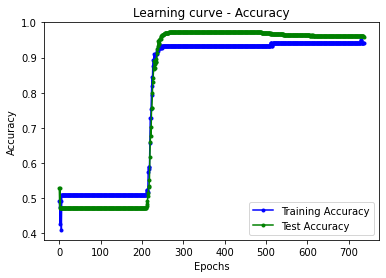

0.9583333333333333 0.042581879869812836
training error 0.12500345308231403, test error 0.25007664180882694
training error 0.12506124697630064, test error 0.250231801884997
training error 0.12503640025764207, test error 0.2501904641295485
training error 0.1251396197536164, test error 0.25030457087798924
training error 0.1249935513708149, test error 0.250262098643476
training error 0.1250270333281673, test error 0.25030243820952003
training error 0.12499470005562092, test error 0.2503366042483138
training error 0.1252626125480991, test error 0.2505055282015285
training error 0.12501019765757543, test error 0.25048336356923095
training error 0.12510476783468844, test error 0.25040702826920774
training error 0.1250058509281406, test error 0.25040256724871535
training error 0.1251068095134156, test error 0.2503593244772688
training error 0.12497002454153085, test error 0.25034481892761357
training error 0.12499667235976805, test error 0.2503572854110455
training error 0.12497144617898678, t

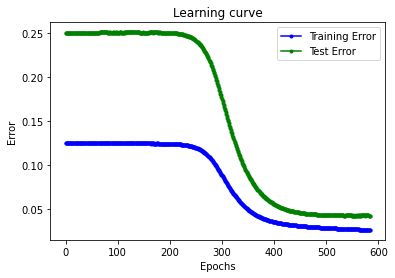

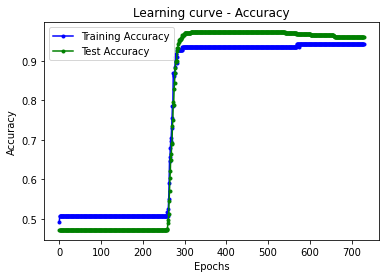

0.9606481481481481 0.042568576393864216


In [46]:
error_vals = []
acc_vals = []

error_trains = []
acc_trains = []

models = []

for i in range(10):
  model, acc_val, error_val, error_train, acc_train = train_test(hyperparams = search_space_def[0][0],
           num_inputs = 17, seed = i, activation_output = sigmoid, activation_hidden = sigmoid,
           task = 'binary_classification', thr = 0.5, stop_class = 'GL', stop_param = 3, data_train = X_train, data_val = X_test)
  
  models += [model]

  acc_vals += [acc_val]
  error_vals += [error_val]
  

  error_trains += [error_train]
  acc_trains += [acc_train]


In [47]:
print('Test error, mean test error and std test error')
print(error_vals)
print(np.mean(error_vals), np.std(error_vals)) 

print('Test accuracy, mean test accuracy and std test accuracy')
print(acc_vals)
print(np.mean(acc_vals), np.std(acc_vals)) 

print('Train error, mean train error and std train error')

print(error_trains)
print(np.mean(error_trains), np.std(error_trains)) 

print('Train accuracy, mean train accuracy and std train accuracy')

print(acc_trains)
print(np.mean(acc_trains), np.std(acc_trains)) 

Test error, mean test error and std test error
[0.042117109128568114, 0.04238018294264801, 0.042593143497150814, 0.042064713083538784, 0.04256066140775207, 0.04226421291424575, 0.04244510415612425, 0.0427091128981698, 0.042581879869812836, 0.042568576393864216]
0.04242846962918746 0.00020624504037845479
Test accuracy, mean test accuracy and std test accuracy
[0.9606481481481481, 0.9606481481481481, 0.9606481481481481, 0.9606481481481481, 0.9606481481481481, 0.9606481481481481, 0.9560185185185185, 0.9583333333333333, 0.9583333333333333, 0.9606481481481481]
0.9597222222222224 0.0015354744399793685
Train error, mean train error and std train error
[0.02449409035076355, 0.025971690548462083, 0.0261468931507741, 0.02612926212410102, 0.026677835367150734, 0.026766582281840666, 0.025110542247187853, 0.024815375356982687, 0.025536844023000625, 0.026597807841580154]
0.025824692329184346 0.000762429753477138
Train accuracy, mean train accuracy and std train accuracy
[0.9426229508196722, 0.942622

Multiple training trials with lambda = 0.001

In [48]:
search_space_def = search_space_dict(layers_range=[1], units_range=[4], eta_0_range=[0.6],
                        alpha_range=[0.4], lamb_range=[0.001], lamb0_range = [0.0], minibatch_size_range = [40], num_targets=1, configurations = 0)    

search_space_def[0][0]

{'units': array([4, 1]),
 'layers': 2,
 'eta_0': 0.6,
 'alpha': 0.4,
 'lamb': 0.001,
 'lamb0': 0.0,
 'minibatch_size': 40}

training error 0.1250084139437088, test error 0.25008057932897676
training error 0.12501031596457085, test error 0.25015805835806904
training error 0.12501963640770625, test error 0.2502542822938578
training error 0.12498285266428451, test error 0.2502821510372059
training error 0.1249980716473125, test error 0.2503738836777854
training error 0.12500092955827138, test error 0.2503835091545526
training error 0.1250539221107434, test error 0.2503451287654612
training error 0.12497867301171182, test error 0.25040279041681013
training error 0.12518038956183247, test error 0.2502678277925596
training error 0.12502954371264552, test error 0.2503519645727861
training error 0.12503059343458547, test error 0.2503591032919014
training error 0.12499679637332678, test error 0.25045027707648304
training error 0.12504466394208533, test error 0.2504126623812252
training error 0.12510174485953038, test error 0.2505655682765611
training error 0.12501862608714565, test error 0.2504307266619356
training 

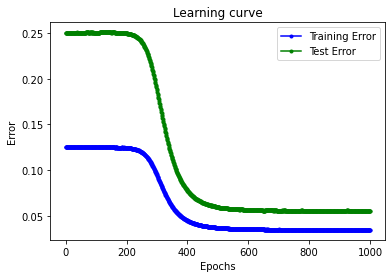

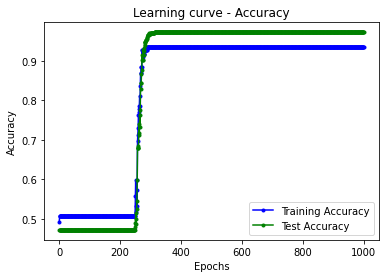

0.9722222222222222 0.05569979682810079
training error 0.1250622256261707, test error 0.250127582552388
training error 0.12508988504872862, test error 0.2501475871106597
training error 0.12503327268991984, test error 0.2501722508165145
training error 0.12513265644180147, test error 0.2502716559426073
training error 0.12519803066317423, test error 0.2505311020585626
training error 0.12496761231401383, test error 0.2504993421762813
training error 0.1249676688083925, test error 0.25049953308808315
training error 0.1250554378323319, test error 0.2503851601620691
training error 0.12503242349759291, test error 0.2503908357620449
training error 0.12500660491303064, test error 0.25056127573523795
training error 0.12499633882933944, test error 0.2505443260296248
training error 0.12497482407864356, test error 0.2505662436413207
training error 0.12497231426007455, test error 0.2506329210936583
training error 0.12503761175780856, test error 0.25057296003824053
training error 0.12503189326508773, te

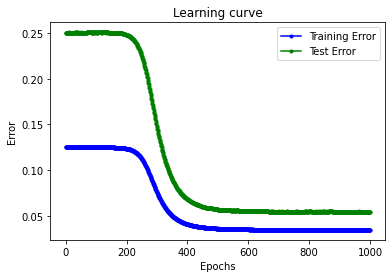

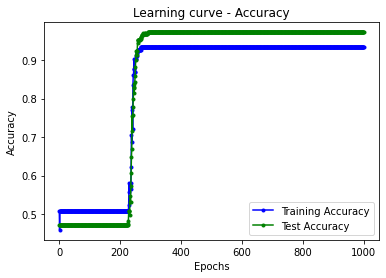

0.9722222222222222 0.05438955805294634
training error 0.1250424112972171, test error 0.2501096557458432
training error 0.12500661527196813, test error 0.2501622128534978
training error 0.12502733080070522, test error 0.25029546109879997
training error 0.12508151482919322, test error 0.250304197070603
training error 0.12504023694584612, test error 0.25043194506224764
training error 0.12497597891288122, test error 0.2505510571454266
training error 0.12497291974963964, test error 0.2505516298252313
training error 0.12502985024586832, test error 0.2506836672465807
training error 0.1250352080852144, test error 0.250646641003996
training error 0.12510559223237291, test error 0.25066792114783903
training error 0.1250593203606304, test error 0.2505910370298258
training error 0.12497326258952168, test error 0.25068664724099954
training error 0.124976195436617, test error 0.25066255841585355
training error 0.12498623761626948, test error 0.25059099485952047
training error 0.12516593188018377, te

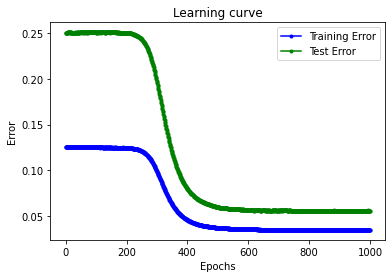

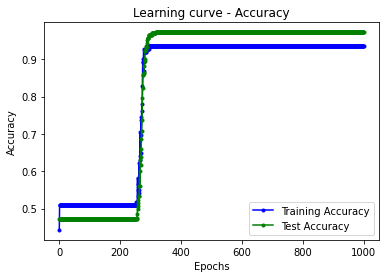

0.9722222222222222 0.055769960453988604
training error 0.12505934142619402, test error 0.25005176406276125
training error 0.12503477567443586, test error 0.250205847459126
training error 0.12509678925992007, test error 0.25032102879401047
training error 0.12505140927545, test error 0.25022072205622303
training error 0.12501170592899985, test error 0.25030452179862384
training error 0.12510408730618383, test error 0.25035341730670096
training error 0.12499839113521423, test error 0.2504450718728104
training error 0.12506184423162323, test error 0.2505142487137012
training error 0.1250202127677789, test error 0.25050673512394755
training error 0.12510783170158876, test error 0.250443208920162
training error 0.12500495038985193, test error 0.25053689948365415
training error 0.12499271743969244, test error 0.25057237860716564
training error 0.12499332435653455, test error 0.25056420410708047
training error 0.12511179999058425, test error 0.2505878576830556
training error 0.125132274828606,

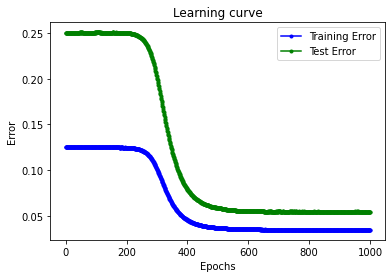

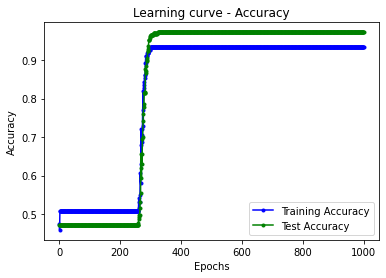

0.9722222222222222 0.05404407414707001
training error 0.1250462860889735, test error 0.2499771523853952
training error 0.12514106741151668, test error 0.25004299706752675
training error 0.12508967977886476, test error 0.2502343491788476
training error 0.12536816990739272, test error 0.25014956029720475
training error 0.1250121441129004, test error 0.25027616342108694
training error 0.12498784675905476, test error 0.25034808720031576
training error 0.125054849656965, test error 0.2504810603162793
training error 0.12503301907262243, test error 0.2504415980948619
training error 0.12508080038339286, test error 0.25045700261676174
training error 0.12510891440793784, test error 0.25040025330383714
training error 0.12502237778879, test error 0.2504178836535482
training error 0.12499855936803851, test error 0.2502868079930623
training error 0.12498515989173188, test error 0.2504008420022289
training error 0.12511474511113632, test error 0.25044713395176893
training error 0.12497272370312619, t

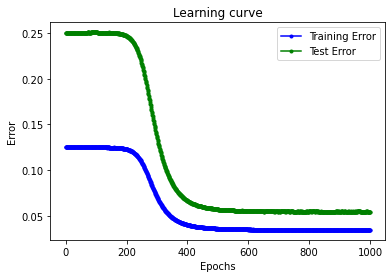

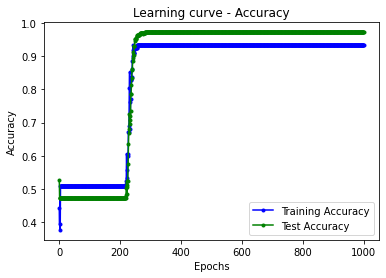

0.9722222222222222 0.05468976923285538
training error 0.12507470042622232, test error 0.25003941199157803
training error 0.12503202013398776, test error 0.25004745833144143
training error 0.125146766676595, test error 0.2502523822737064
training error 0.12504414773692535, test error 0.2502718752800295
training error 0.12498135436050015, test error 0.2502989236400842
training error 0.1250065698820888, test error 0.25023094162813797
training error 0.12501463545036406, test error 0.2503183377049009
training error 0.12501701069224308, test error 0.25035254801460594
training error 0.12501252704452775, test error 0.25043558777027636
training error 0.12496589285047659, test error 0.25042595140083646
training error 0.12497545031904293, test error 0.25038625524966646
training error 0.12496986688923745, test error 0.2503669286575839
training error 0.12498802300373377, test error 0.25037485066416304
training error 0.12498792042568209, test error 0.25035992767161735
training error 0.12504734011334

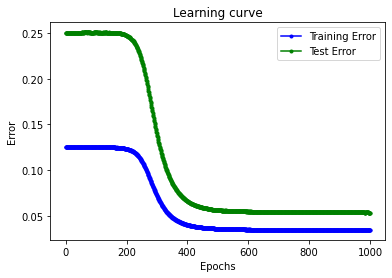

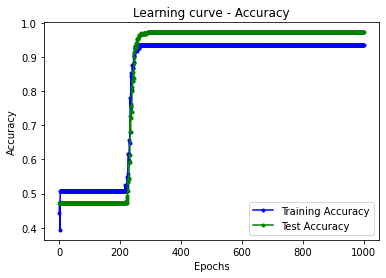

0.9722222222222222 0.053269746948341384
training error 0.12505642480558482, test error 0.25004921939662383
training error 0.12512972866509603, test error 0.25022814623673334
training error 0.12514795225043998, test error 0.2501782945516562
training error 0.12498712222517248, test error 0.25032785595957424
training error 0.12499514138841818, test error 0.2504165286681553
training error 0.1250398227131689, test error 0.25040075593740774
training error 0.1249977786629477, test error 0.2504709668026573
training error 0.12500177005955362, test error 0.2504131540994818
training error 0.1250919784047905, test error 0.25039855233537955
training error 0.12500242731147562, test error 0.2503787087387688
training error 0.12504071425687288, test error 0.25032790917485365
training error 0.12503886637654302, test error 0.25041979213551135
training error 0.12510306197970097, test error 0.2504311173946403
training error 0.12513162195139396, test error 0.2504387351721267
training error 0.124966681727004

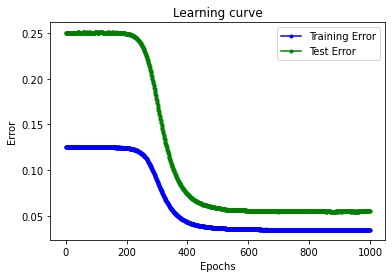

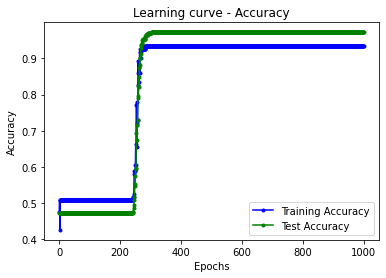

0.9722222222222222 0.054916627620149296
training error 0.12501761939688735, test error 0.25006646955019424
training error 0.12499554038170171, test error 0.2500812775142675
training error 0.12500582768740653, test error 0.2501415921200335
training error 0.1249885178781035, test error 0.25016461772800686
training error 0.12501383079051662, test error 0.2502987574596017
training error 0.12499570564863093, test error 0.25027350129586706
training error 0.12497216806987967, test error 0.25033894596045764
training error 0.12500642874128842, test error 0.2503760170358871
training error 0.12508596238076042, test error 0.2505276153972046
training error 0.12503383575901394, test error 0.2504489623610726
training error 0.12515090983772714, test error 0.2503477317271914
training error 0.12503403845727704, test error 0.25052588071356346
training error 0.12501765712040225, test error 0.25063557984345636
training error 0.1250027405372344, test error 0.2504718176347924
training error 0.125076548280009

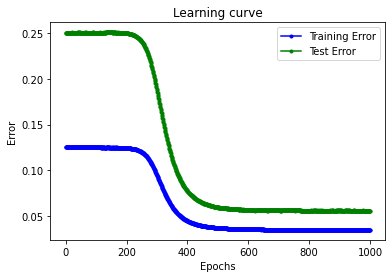

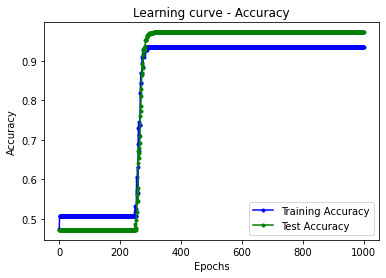

0.9722222222222222 0.05574340932275785
training error 0.12501991024728132, test error 0.25000397831628196
training error 0.12510841608538098, test error 0.25006573048639114
training error 0.12507894802058617, test error 0.25014835682937925
training error 0.12500362452953967, test error 0.25013127042930977
training error 0.1250588513061386, test error 0.25010860697832726
training error 0.1250126010037951, test error 0.2502175682287461
training error 0.12507872782684268, test error 0.25029360669775574
training error 0.12499060712470773, test error 0.25028247152009314
training error 0.12519072092062244, test error 0.25039437682113913
training error 0.12496783933081675, test error 0.25027557361570807
training error 0.1250423298649822, test error 0.25025441147511474
training error 0.1249697030475004, test error 0.2503583679969363
training error 0.1250810041697216, test error 0.2505032255262019
training error 0.1250281982199141, test error 0.2503486235697473
training error 0.1249856456511056

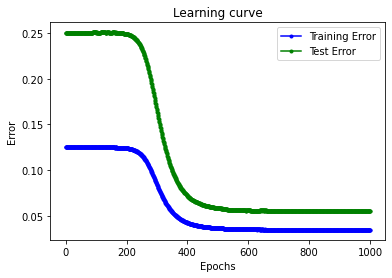

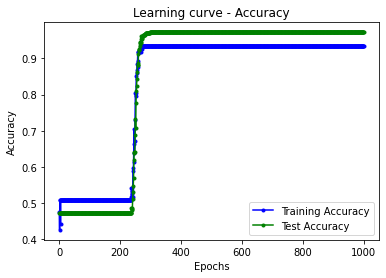

0.9722222222222222 0.055162376864465866
training error 0.12504280428301404, test error 0.2500412701881496
training error 0.12503766662869648, test error 0.2502097005127674
training error 0.12498304580536292, test error 0.2502011510074309
training error 0.12504861923213423, test error 0.25031997850623394
training error 0.12498460263683248, test error 0.2502860334327375
training error 0.1251148968095411, test error 0.2503942456792911
training error 0.12502946292995212, test error 0.25030553345493006
training error 0.12500441143917596, test error 0.25040601688272807
training error 0.12507411964763449, test error 0.25035812465518076
training error 0.1251408690104304, test error 0.25049044161798906
training error 0.12496648844471854, test error 0.2503486978159542
training error 0.1250327490977499, test error 0.25023876053024025
training error 0.12496990909568001, test error 0.2503275187317574
training error 0.12497363629967749, test error 0.25033286065621607
training error 0.124984819016392

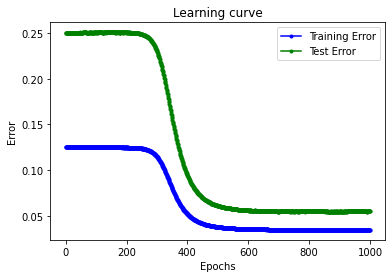

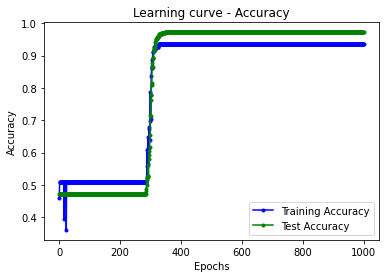

0.9722222222222222 0.05490876881396394


In [49]:
error_vals = []
acc_vals = []

error_trains = []
acc_trains = []

models = []

for i in range(10):
  model, acc_val, error_val, error_train, acc_train = train_test(hyperparams = search_space_def[0][0],
           num_inputs = 17, seed = i, activation_output = sigmoid, activation_hidden = sigmoid,
           task = 'binary_classification', thr = 0.5, stop_class = 'GL', stop_param = 3, data_train = X_train, data_val = X_test)
  
  models += [model]

  acc_vals += [acc_val]
  error_vals += [error_val]
  

  error_trains += [error_train]
  acc_trains += [acc_train]


In [50]:
print('Test error, mean test error and std test error')
print(error_vals)
print(np.mean(error_vals), np.std(error_vals)) 

print('Test accuracy, mean test accuracy and std test accuracy')
print(acc_vals)
print(np.mean(acc_vals), np.std(acc_vals)) 

print('Train error, mean train error and std train error')

print(error_trains)
print(np.mean(error_trains), np.std(error_trains)) 

print('Train accuracy, mean train accuracy and std train accuracy')

print(acc_trains)
print(np.mean(acc_trains), np.std(acc_trains)) 

Test error, mean test error and std test error
[0.05569979682810079, 0.05438955805294634, 0.055769960453988604, 0.05404407414707001, 0.05468976923285538, 0.053269746948341384, 0.054916627620149296, 0.05574340932275785, 0.055162376864465866, 0.05490876881396394]
0.05485940882846394 0.0007652219308914056
Test accuracy, mean test accuracy and std test accuracy
[0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222]
0.9722222222222221 1.1102230246251565e-16
Train error, mean train error and std train error
[0.03475771288730631, 0.03452435798531528, 0.03483671767254945, 0.03447597542152125, 0.034568680537784696, 0.034402489706690326, 0.03457347987986513, 0.034778642656996935, 0.03458475644002566, 0.03460169247459638]
0.03461045056626515 0.0001318192889368122
Train accuracy, mean train accuracy and std train accuracy
[0.9344262295081968, 0.934426229